In [60]:
from understatscraper import Understat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mplsoccer.pitch import Pitch, VerticalPitch
from matplotlib import dates

In [2]:
understat = Understat()

### Enes Ünal -  Getafe

In [3]:
# Getafe match ids

ids = [17136,17154,17162,17167,17184,17187,17205,17214,17221,17232,17244,17253,17265,17269,17279,17289,17296,17310,
      17323,17333,17342,17352,17361,17367,17379,17389,17401,17410,17417,17431,17441,17450,17458,17469,17481,17489,17501,17515]
ids = [str(x) for x in ids]

In [4]:
# creating dataframe

df = pd.DataFrame()
for x in ids:
    df_getafe = understat.single_match(x)
    df = df.append(df_getafe)

In [5]:
enes = df[df.player == 'Enes Ünal']

In [6]:
enes[['X','Y','xG']] = enes[['X','Y','xG']].apply(pd.to_numeric,axis=1)

In [7]:
enes['date'] = pd.to_datetime(enes['date'])

In [8]:
enes['xg_cumulative'] = enes['xG'].cumsum()

In [9]:
enes['goal'] = np.where(enes['result']=='Goal',1,0)
enes['goal_cumulative'] = enes['goal'].cumsum()

### xG flow chart

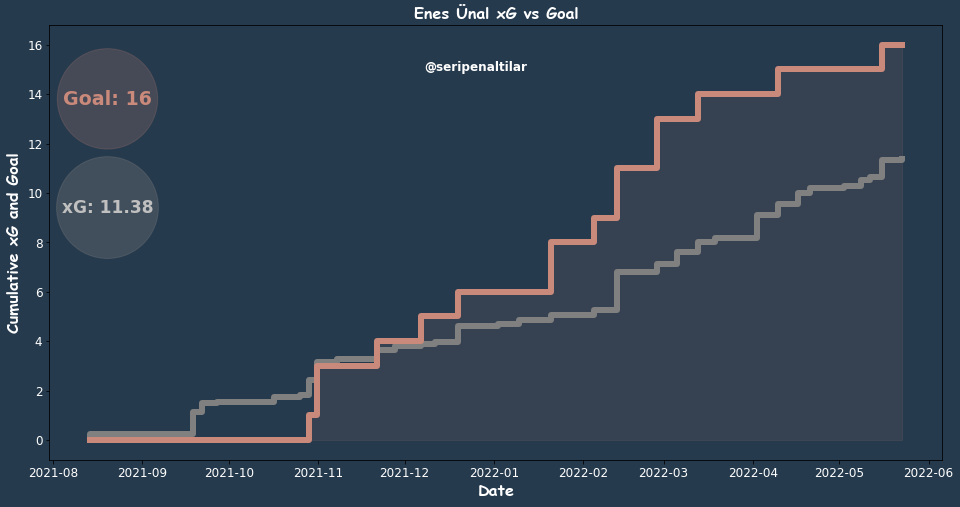

In [81]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=enes['date'],y=enes['xg_cumulative'],c="#808080",linewidth=6)
ax.step(x=enes['date'],y=enes['goal_cumulative'],c="#c9897b",linewidth=6)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(enes['date'],enes['goal_cumulative'],alpha=0.1,color="#c9897b",step='pre') 
#step is to fill below entire line


plt.text(0.065, 0.83, "Goal: {}".format(round(enes['goal_cumulative'].max(),2)), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

#transform is to normalize the circle with the figure

plt.text(0.065, 0.58, "xG: {}".format(round(enes['xg_cumulative'].max(),2)), size=17,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('Enes Ünal xG vs Goal',fontdict=font)
plt.grid(False)

#formatter = dates.DateFormatter('%Y-%m')
#ax.xaxis.set_major_formatter(formatter)
#plt.gcf().autofmt_xdate(rotation=90)
#ax.xaxis.set_major_locator(dates.DayLocator(interval=30))

plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Shotmap

In [11]:
enes[['X','Y']] = enes[['X','Y']]*100

In [12]:
enes['result'].value_counts()

MissedShots    32
BlockedShot    24
Goal           16
SavedShot      12
ShotOnPost      2
Name: result, dtype: int64

In [13]:
xG_per_shot = round(enes['xG'].sum()/len(enes),2)

In [14]:
conversion = round(len(enes[enes['result']=='Goal'])/len(enes),2)

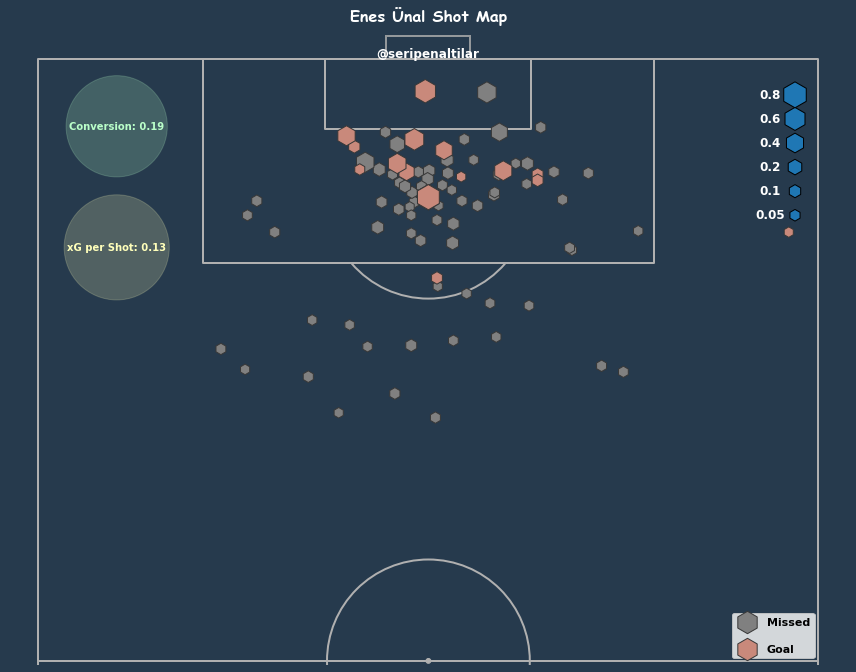

In [19]:
pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_type='box',
                     goal_alpha=0.8,
                     pitch_type='opta',
                     pitch_color='#263a4d'
                     )

fig,ax = pitch.draw(figsize=(12,10))

fig.patch.set_facecolor('#263a4d')


re1 = pitch.scatter(enes[enes['result']!='Goal']['X'],enes[enes['result']!='Goal']['Y'],s=(enes[enes['result']!='Goal']['xG']*720)+100,
                   c='#808080',marker='h',edgecolors='#383838',ax=ax,label='Missed')

re = pitch.scatter(enes[enes['result']=='Goal']['X'],enes[enes['result']=='Goal']['Y'],s=(enes[enes['result']=='Goal']['xG']*720)+100,
                   c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal')

#legends

legend = ax.legend(bbox_to_anchor=(0.965,0.09),labelspacing=1.5,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]


mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]

mx = [3,3,3,3,3,3]
my = [87,89,91,93,95,97]

plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h')
for i in range(len(mx)):
    plt.text(mx[i]+3.2,my[i],mSize[i],fontsize=12,c='white',ha='center',va='center',fontweight='bold')

plt.figtext(0.44,0.9,'@seripenaltilar',fontweight='bold',fontsize=12,color='white')
font = {'family': 'Comic Sans MS',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }

plt.text(0.13, 0.8450, "Conversion: {}".format(conversion), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#baffc9",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#baffc9',alpha=0.20)
         )

plt.text(0.13, 0.6550, "xG per Shot: {}".format(xG_per_shot), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#ffffba",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#ffffba',alpha=0.20)
         )

plt.title('Enes Ünal Shot Map',fontdict=font,color='white')

plt.show()

In [59]:
enes[enes['result']=='Goal']['situation'].value_counts()

OpenPlay      9
FromCorner    4
Penalty       2
SetPiece      1
Name: situation, dtype: int64

In [64]:
enes[enes['result']=='Goal']['shotType'].value_counts()

RightFoot    11
Head          4
LeftFoot      1
Name: shotType, dtype: int64

### Functions

### Creating dataframe

In [282]:
def dataframe(player,ids=ids):
    # player must be string
    understat = Understat() 
    df = pd.DataFrame()
    for x in ids:
        df_x = understat.single_match(x)
        df = df.append(df_x)
        
    df = df[df.player == player] # choosing player
    
    df[['X','Y','xG']] = df[['X','Y','xG']].apply(pd.to_numeric,axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['xg_cumulative'] = df['xG'].cumsum()
    df['goal'] = np.where(df['result']=='Goal',1,0)
    df['goal_cumulative'] = df['goal'].cumsum()
    df[['X','Y']] = df[['X','Y']]*100
    
    return df

### Creating xG flow

In [229]:
def xg(df,player):
    
    fig,ax = plt.subplots(figsize=(16,8))
    
    ax.step(x=df['date'],y=df['xg_cumulative'],c="#808080",linewidth=6)
    ax.step(x=df['date'],y=df['goal_cumulative'],c="#c9897b",linewidth=6)

    ax.set_facecolor(color='#263a4d')
    fig.patch.set_facecolor('#263a4d')

    plt.fill_between(df['date'],df['goal_cumulative'],alpha=0.1,color="#c9897b",step='pre') 
    #step is to fill below entire line


    plt.text(0.065, 0.83, "Goal: {}".format(round(df['goal_cumulative'].max(),2)), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

    #transform is to normalize the circle with the figure

    plt.text(0.065, 0.58, "xG: {}".format(round(df['xg_cumulative'].max(),1)), size=18,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

    font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

    plt.xlabel('Date',fontdict=font)
    plt.ylabel('Cumulative xG and Goal', fontdict=font)
    plt.xticks(fontsize=12,c='white')
    plt.yticks(fontsize=12,c='white')
    plt.title(player + ' xG vs Goal',fontdict=font)
    plt.grid(False)

    plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

    plt.show()
    

### Creating Shot map

In [362]:
def shotmap(df,player):
    
    
    xG_per_shot = round(df['xG'].sum()/len(df),2)
    conversion = round(len(df[df['result']=='Goal'])/len(df),2)
    
    pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_type='box',
                     goal_alpha=0.8,
                     pitch_type='opta',
                     pitch_color='#263a4d'
                     )

    fig,ax = pitch.draw(figsize=(12,10))

    fig.patch.set_facecolor('#263a4d')


    re = pitch.scatter(df[df['result']!='Goal']['X'],df[df['result']!='Goal']['Y'],
                       s=(df[df['result']!='Goal']['xG']*720)+100,
                   c='#808080',marker='h',edgecolors='#383838',ax=ax,label='Missed')

    re1 = pitch.scatter(df[df['result']=='Goal']['X'],df[df['result']=='Goal']['Y'],
                        s=(df[df['result']=='Goal']['xG']*720)+100,
                   c='#c9897b',marker='h',edgecolors='#383838',ax=ax,label='Goal')

    #legends

    legend = ax.legend(bbox_to_anchor=(0.965,0.09),labelspacing=1.5,prop={'weight':'bold','size':11})
    legend.legendHandles[0]._sizes = [500]
    legend.legendHandles[1]._sizes = [500]


    mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
    mSizeS = [720 * i for i in mSize]
    mSizeS = [100 + i for i in mSizeS]

    mx = [3,3,3,3,3,3]
    my = [87,89,91,93,95,97]

    plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h')
    for i in range(len(mx)):
        plt.text(mx[i]+3.2,my[i],mSize[i],fontsize=12,c='white',ha='center',va='center',fontweight='bold')

    plt.figtext(0.44,0.9,'@seripenaltilar',fontweight='bold',fontsize=12,color='white')
    font = {'family': 'Comic Sans MS',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }

    plt.text(0.13, 0.8450, "Conversion: {}".format(conversion), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#baffc9",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#baffc9',alpha=0.20)
         )

    plt.text(0.13, 0.6550, "xG per Shot: {}".format(xG_per_shot), size=10,
         ha="center", va="center",transform=ax.transAxes,
         color="#ffffba",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#ffffba',alpha=0.20)
         )

    plt.title(player + ' Shot Map',fontdict=font,color='white')

    plt.show()

### Cengiz Ünder - Marseille 21/22

In [90]:
# match ids has to be manually added
# Marseille match ids 2021-2022

ids = [17831,17841,17854,17871,17877,17883,17896,17904,17916,17925,17851,17935,17946,17968,17977,17987,17992,
      18006,18016,18023,18036,17955,18046,18061,18071,18072,18089,18093,18106,18119,18128,18138,18147,18159,
      18164,18177,18186,18195]

ids = [str(x) for x in ids]

In [52]:
df = dataframe('Cengiz Ünder')

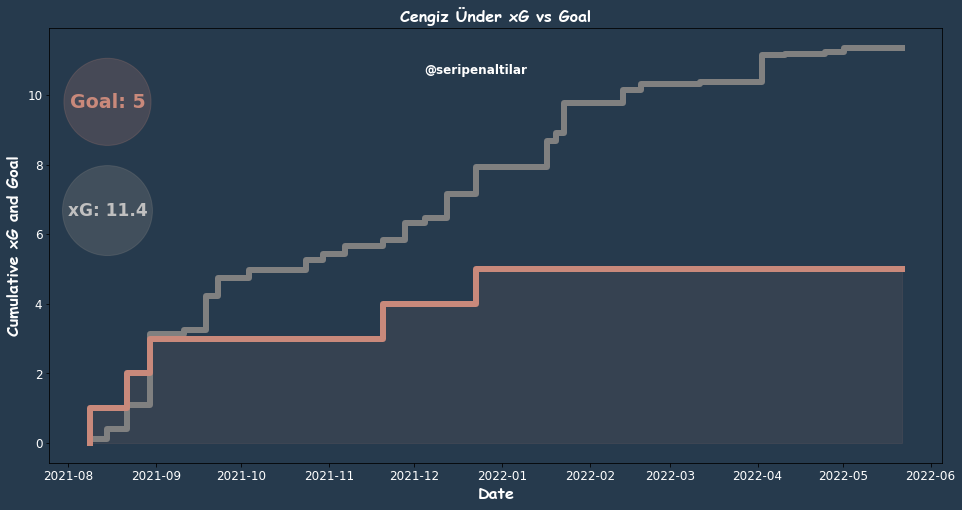

In [99]:
xg(df,'Cengiz Ünder')

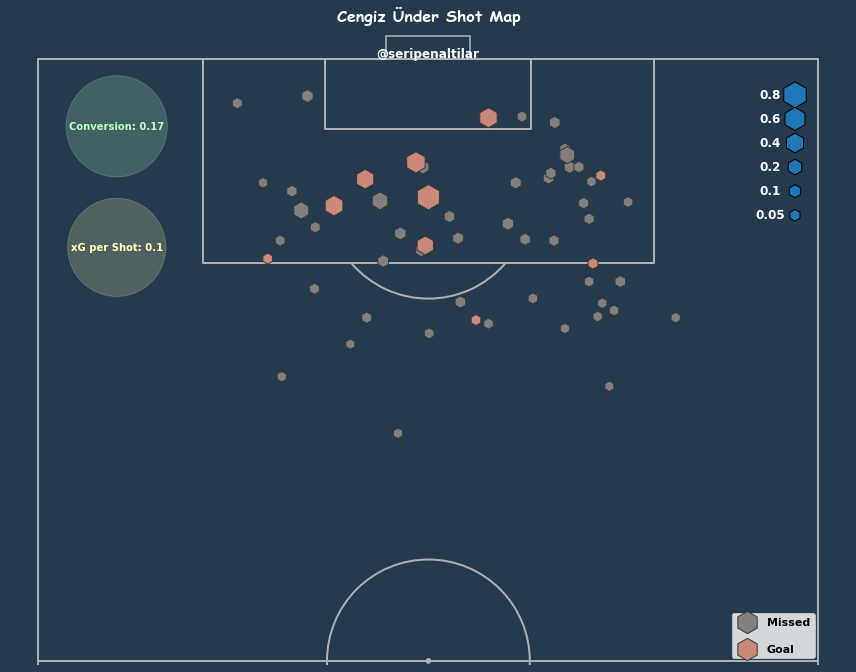

In [55]:
shotmap(df,'Cengiz Ünder')

In [56]:
df[df['result']=='Goal']['situation'].value_counts()

OpenPlay      8
FromCorner    1
Penalty       1
Name: situation, dtype: int64

In [57]:
df[df['result']=='Goal']['shotType'].value_counts()

LeftFoot     9
RightFoot    1
Name: shotType, dtype: int64

### Burak Yilmaz - Lille 21/22

In [91]:
# match ids has to be manually added
# Lille match ids 2021-2022

ids = [17830,17833,17844,17860,17867,17876,17891,17900,17904,17914,17923,17939,17944,17961,17966,17979,17982,17995,
      18002,18023,18020,18034,18044,18055,18067,18079,18087,18095,18111,18113,18122,18132,18149,18153,18169,
      18179,18187,18193]

ids = [str(x) for x in ids]

In [136]:
df = dataframe('Burak Yilmaz')

In [137]:
df.reset_index(inplace=True) # Burak Yilmaz has 4 goal this season source Ligue 1 website
# goal against Metz was an own-goal

In [138]:
df.drop(index=1,inplace=True)

In [139]:
df['xg_cumulative'] = df['xG'].cumsum()
df['goal'] = np.where(df['result']=='Goal',1,0) 
df['goal_cumulative'] = df['goal'].cumsum()

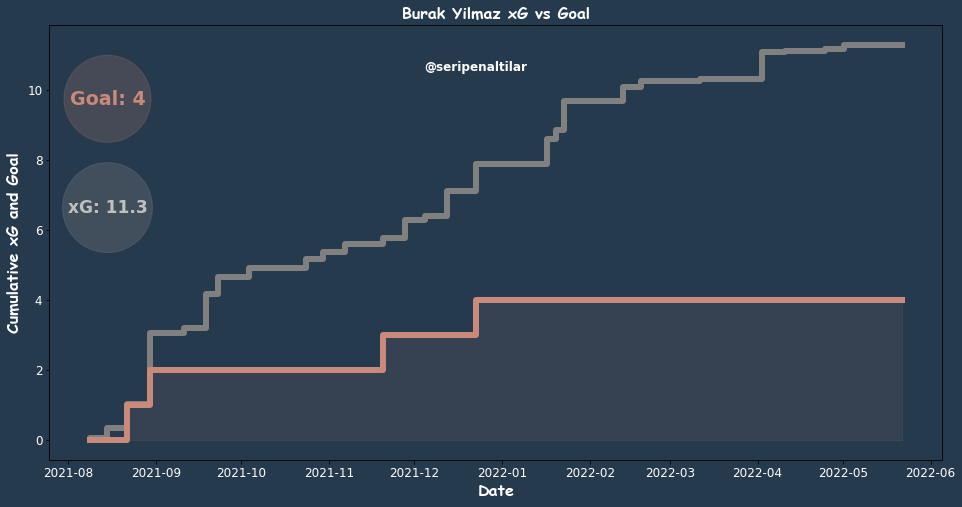

In [142]:
xg(df,'Burak Yilmaz')

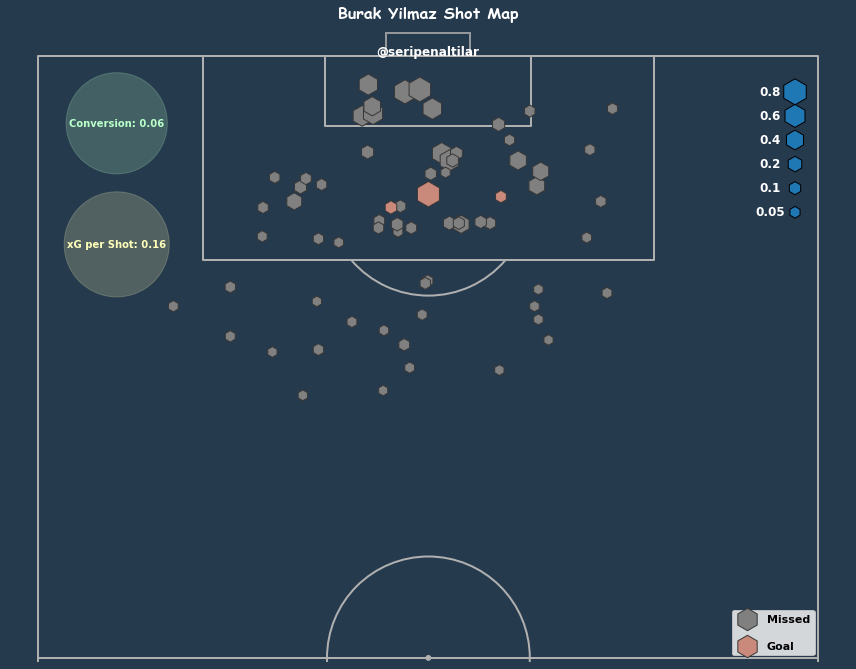

In [141]:
shotmap(df,'Burak Yilmaz')

In [127]:
df[df['result']=='Goal']['situation'].value_counts()

OpenPlay    2
Penalty     2
Name: situation, dtype: int64

In [128]:
df[df['result']=='Goal']['shotType'].value_counts()

RightFoot    3
LeftFoot     1
Name: shotType, dtype: int64

### Hakan Calhanoglu - Inter 21/22

In [153]:
ids1 = [16757,16767,16783,16789,16799,16808,16824,16830,16840,16847,16861,16870,16881,16895,16901,16912,16919,16932,
      16939,16960,16966,16980,16989,17002,17009,17018,17030,17044,17050,17059,17070,17084,17090,16947,17105,17109,17117,
      17129]

ids1 = [str(x) for x in ids]

In [155]:
df = dataframe(player='Hakan Calhanoglu',ids=ids1)

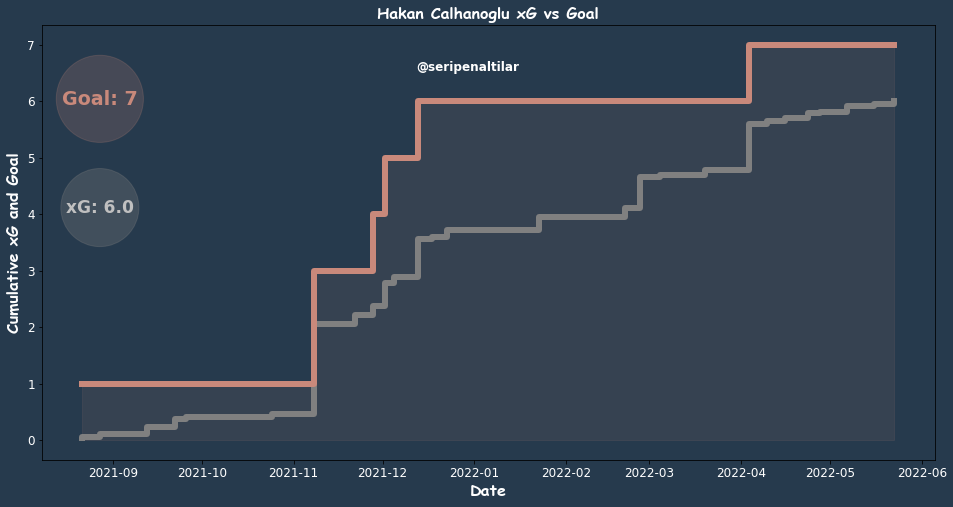

In [156]:
xg(df,'Hakan Calhanoglu')

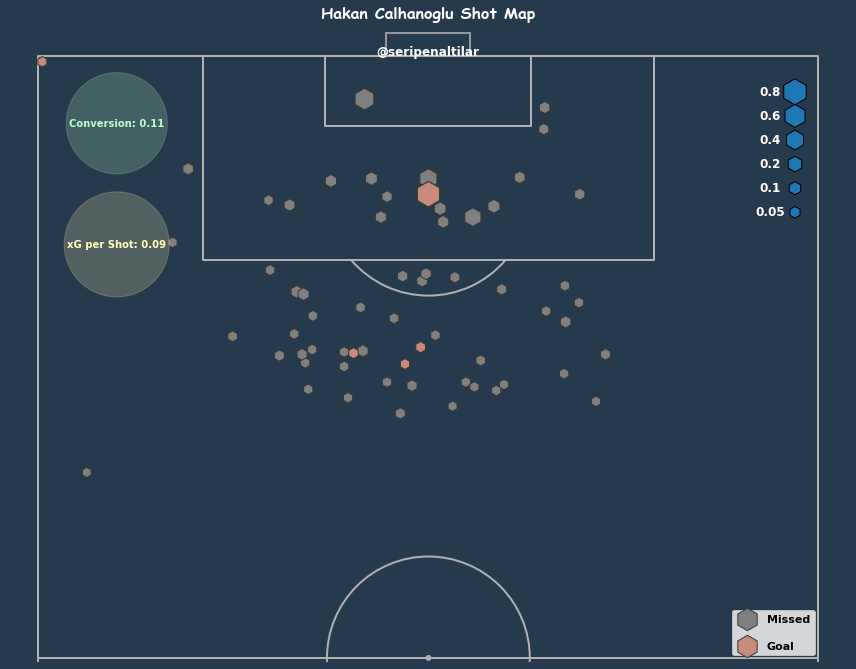

In [157]:
shotmap(df,'Hakan Calhanoglu')

In [162]:
df[df['result']=='Goal']['situation'].value_counts()

OpenPlay      3
Penalty       3
FromCorner    1
Name: situation, dtype: int64

In [166]:
df[df['result']=='Goal']['shotType'].value_counts()

RightFoot    7
Name: shotType, dtype: int64

### Sadio Mane - Liverpool

In [217]:
seasons = [2015,2016,2017,2018,2019,2020,2021]

### Extracting data from seasons

In [289]:
def season(player,team,league,seasons=seasons):
    # player must be string
    understat = Understat() 
    df = pd.DataFrame()
    for x in seasons:
        df_s = understat.season(league,x,team=team,player=player)
        df = df.append(df_s)
    
    df[['X','Y','xG']] = df[['X','Y','xG']].apply(pd.to_numeric,axis=1)
    df['date'] = pd.to_datetime(df['date'])
    df['xg_cumulative'] = df['xG'].cumsum()
    df['goal'] = np.where(df['result']=='Goal',1,0)
    df['goal_cumulative'] = df['goal'].cumsum()
    df[['X','Y']] = df[['X','Y']]*100
    
    return df

In [182]:
mane = season(player='Sadio Mané',team='Liverpool',league='EPL')

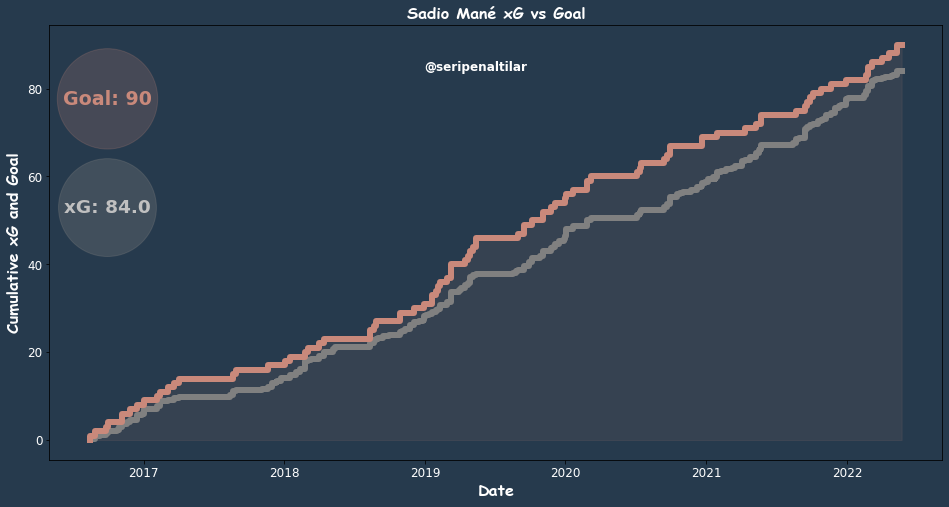

In [189]:
xg(df=mane,player='Sadio Mané')

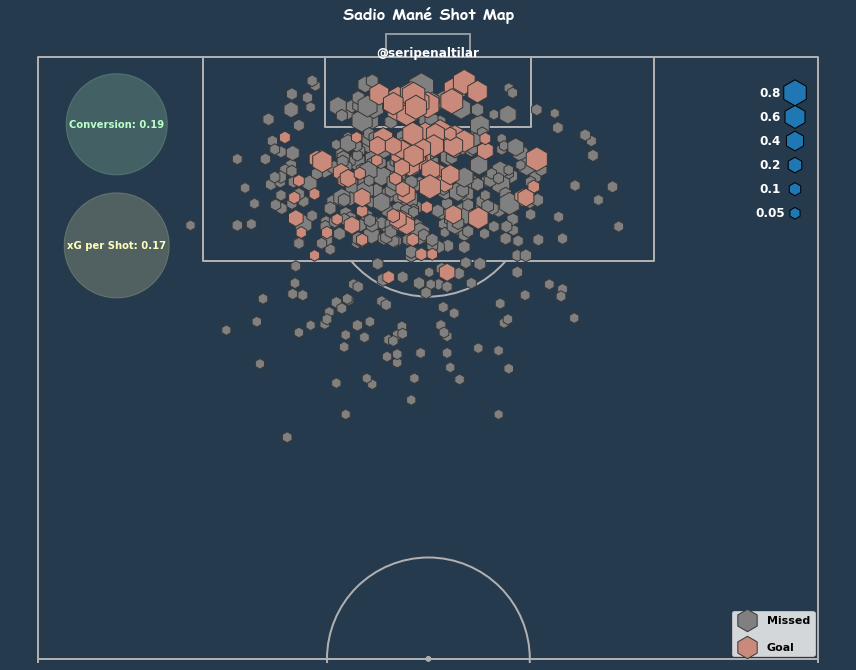

In [265]:
shotmap(df=mane,player='Sadio Mané')

In [193]:
mane[mane['result']=='Goal']['situation'].value_counts()

OpenPlay      83
FromCorner     6
SetPiece       1
Name: situation, dtype: int64

In [195]:
mane[mane['result']=='Goal']['shotType'].value_counts()

RightFoot    52
LeftFoot     24
Head         14
Name: shotType, dtype: int64

In [288]:
#gol 90,asist 90,sut 90,xG 90, conversion, xG pber shot

### Wout Weghorst

In [290]:
seasons = [2018,2019,2020,2021]

In [291]:
wego_bl = season(player='Wout Weghorst',team='Wolfsburg',league='Bundesliga')

In [293]:
pl_seasons = [2021]

In [294]:
wego_pl = season(player='Wout Weghorst',team='Burnley',league='EPL',seasons=pl_seasons)

In [297]:
wego = pd.concat([wego_bl,wego_pl])

In [300]:
wego['xg_cumulative'] = wego['xG'].cumsum()

In [302]:
wego['goal_cumulative'] = wego['goal'].cumsum()

### xG and Shotmap

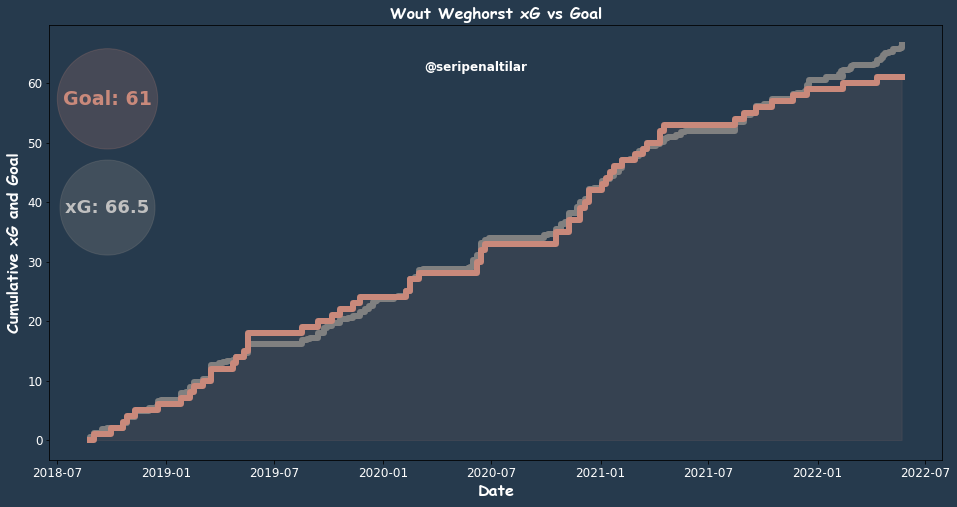

In [304]:
xg(df=wego,player='Wout Weghorst')

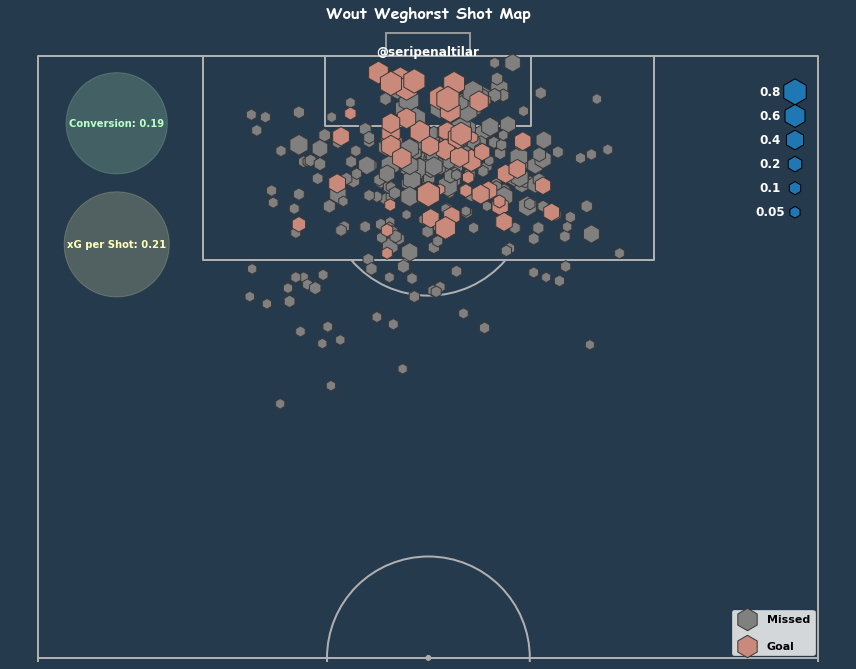

In [305]:
shotmap(df=wego,player='Wout Weghorst')

### Assists

In [341]:
seasons = [2018,2019,2020,2021]

In [342]:
wolf = pd.DataFrame()
for x in seasons:
    df_wolf = understat.season('Bundesliga', x, team='Wolfsburg')
    wolf = wolf.append(df_wolf)

In [344]:
burn = understat.season('EPL', 2021, team='Burnley')

In [353]:
wb = pd.concat([wolf,burn])

In [348]:
wb = wb[(wb['result']=='Goal') & (wb['player_assisted']=='Wout Weghorst')]

In [355]:
wb = wb[wb['player_assisted']=='Wout Weghorst']

In [356]:
wb[['X','Y','xG']] = wb[['X','Y','xG']].apply(pd.to_numeric,axis=1)
wb['date'] = pd.to_datetime(wb['date'])
wb['goal'] = np.where(wb['result']=='Goal',1,0)
wb['goal_cumulative'] = wb['goal'].cumsum()
wb[['X','Y']] = wb[['X','Y']]*100

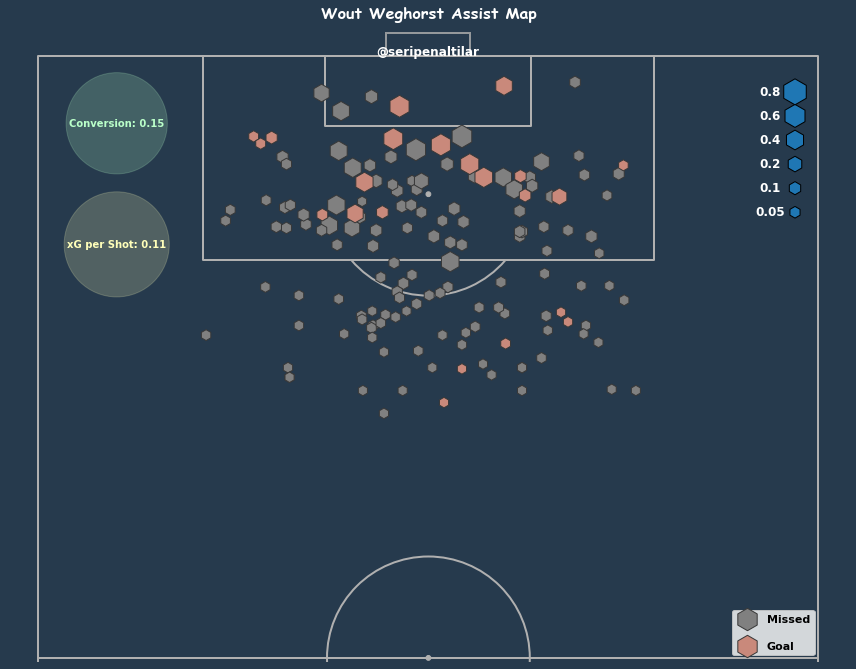

In [361]:
shotmap(df=wb,player='Wout Weghorst')

### Press vs xG per Shot

In [382]:
#scraping matchlog from fbref

def matchlog(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
        
    df.columns = column_lst
    df = df.fillna('0')
    df = df.apply(pd.to_numeric, errors='ignore')
    return df

In [386]:
weg18 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2018-2019/summary/Wout-Weghorst-Match-Logs')
weg19 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2019-2020/summary/Wout-Weghorst-Match-Logs')
weg20 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2020-2021/summary/Wout-Weghorst-Match-Logs')
weg21 = matchlog('https://fbref.com/en/players/c4e87b8b/matchlogs/2021-2022/summary/Wout-Weghorst-Match-Logs')